# Classification

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier

# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Extract features and target
X, y = mnist['data'], mnist['target']

Shape of the data: (70000, 784)
Shape of the target: (70000,)


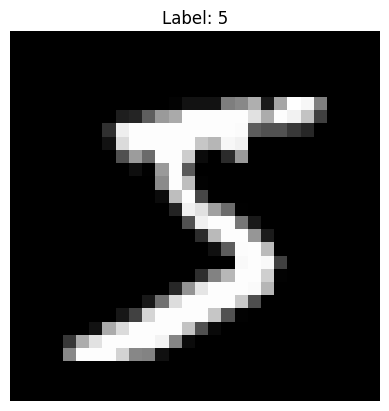

In [2]:
# Look at the shape of the data
print("Shape of the data:", X.shape)  # (70000, 784)
print("Shape of the target:", y.shape)  # (70000,)

# Extract 1 data point
sample_index = 0
sample_data = X.iloc[sample_index]
sample_label = y.iloc[sample_index]

# Reshape the data point into a 28x28 matrix
sample_image = sample_data.values.reshape(28, 28)

# Visualize the reshaped data point
plt.imshow(sample_image, cmap='gray')
plt.title(f'Label: {sample_label}')
plt.axis('off')
plt.show()

In [3]:
# Create a train set (60,000) and a test set (10,000)
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [4]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Create binary labels for detecting '5'
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

# Train a binary classifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

# Make predictions
y_pred_5 = sgd_clf.predict(X_test)

# Evaluate the model
print("Binary Classification (5-detector):")
print("Confusion Matrix:\n", confusion_matrix(y_test_5, y_pred_5))
print("Precision:", precision_score(y_test_5, y_pred_5))
print("Recall:", recall_score(y_test_5, y_pred_5))

Binary Classification (5-detector):
Confusion Matrix:
 [[8707  401]
 [ 107  785]]
Precision: 0.6618887015177066
Recall: 0.8800448430493274


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train a multiclass classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print("Multiclass Classification (Digit Detector):")
print(classification_report(y_test, y_pred))

Multiclass Classification (Digit Detector):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.96      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.98      0.97      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [6]:
# Create multilabel targets
y_train_multilabel = np.array([[int(label) % 2, int(label) < 5] for label in y_train])
y_test_multilabel = np.array([[int(label) % 2, int(label) < 5] for label in y_test])

# Train a KNeighborsClassifier for multilabel classification
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train_multilabel)

# Make predictions
y_pred_multilabel = knn_clf.predict(X_test)

# Evaluate the model
print("Multilabel Classification (Odd/Even and Small/Large):")
print("Confusion Matrix:\n", confusion_matrix(y_test_multilabel.argmax(axis=1), y_pred_multilabel.argmax(axis=1)))

Multilabel Classification (Odd/Even and Small/Large):
Confusion Matrix:
 [[6952   54]
 [  74 2920]]


Available indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/Users/hungnguy/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


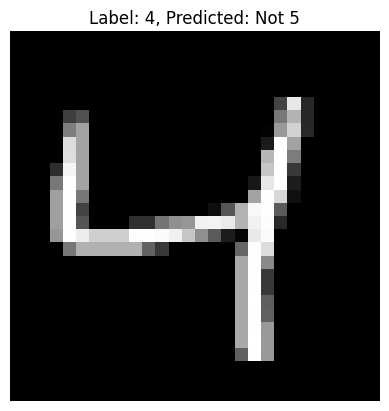

In [7]:
# Function to select an image and label it
def select_and_label_image(indices):
    # Display available indices
    print("Available indices:", indices)

    # User selects an index
    sample_index = int(input("Select an index from the list above: "))

    if sample_index not in indices:
        print("Invalid index selected. Please choose from the available indices.")
        return

    # Extract the sample data and label
    sample_data = X.iloc[sample_index]
    sample_label = y.iloc[sample_index]

    # Reshape the data point into a 28x28 matrix
    sample_image = sample_data.values.reshape(28, 28)

    # Make a prediction
    prediction = sgd_clf.predict([sample_data])

    # Visualize the reshaped data point
    plt.imshow(sample_image, cmap='gray')
    plt.title(f'Label: {sample_label}, Predicted: {"5" if prediction[0] else "Not 5"}')
    plt.axis('off')
    plt.show()

# Example usage: Select and label an image from a list of indices
available_indices = list(range(10))  # For example, the first 10 images
select_and_label_image(available_indices)